Import Libraries

In [1]:
import math
import os
import random
import re
import sys
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

Load the Data

In [21]:
file = open("bigger_data_set.txt", "r")
stock = []
stk_data = []
while True:
	content=file.readline().split()
	if not content:
		break
	stock.append(content[0])
	stk_data.append(list(map(float,content[1:])))
file.close()

stk_data = np.array(stk_data)
df = pd.DataFrame(stk_data.T, columns=stock)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CAL     505 non-null    float64
 1   UCB     505 non-null    float64
 2   RIT     505 non-null    float64
 3   UCLA    505 non-null    float64
 4   UCSC    505 non-null    float64
 5   UFL     505 non-null    float64
 6   UMAD    505 non-null    float64
 7   RICE    505 non-null    float64
 8   UMD     505 non-null    float64
 9   UCSC    505 non-null    float64
dtypes: float64(10)
memory usage: 39.6 KB


Analyze Data

<Axes: >

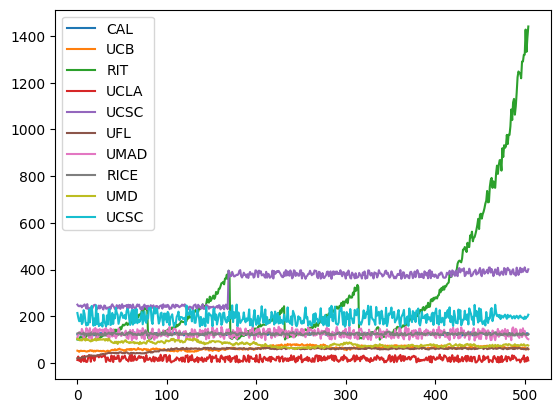

In [25]:
df.plot()

Exponential Moving Average (EMA) Algorithm Building

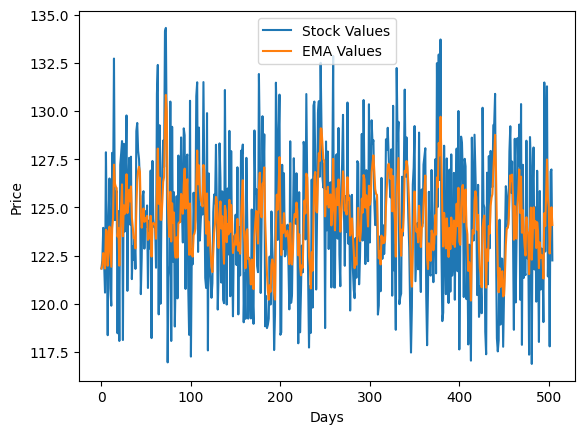

In [89]:
ema = df['CAL'].ewm(span=5,adjust=False).mean()
 
# Comparison plot b/w stock values & EMA
plt.plot(df['CAL'], label="Stock Values")
plt.plot(ema, label="EMA Values")
plt.xlabel("Days")
plt.ylabel("Price")
plt.legend()
plt.show()

In [90]:
df['CAL']

0      121.83
1      122.26
2      123.94
3      122.11
4      120.58
        ...  
500    124.11
501    117.79
502    126.86
503    126.97
504    122.25
Name: CAL, Length: 505, dtype: float64

In [91]:
ema

0      121.830000
1      121.973333
2      122.628889
3      122.455926
4      121.830617
          ...    
500    125.012218
501    122.604812
502    124.023208
503    125.005472
504    124.086981
Name: CAL, Length: 505, dtype: float64

In [99]:
def computeSMA(arr):
    return sum(arr)/len(arr)

def computeEMA(curPrice,dayPeriod,prevEMA):
    k = 2 / (dayPeriod + 1)
    return((curPrice * k) + (prevEMA * (1 - k)))

In [140]:
data = list(map(float,df['CAL'].values))

emaShort = []
emaLong = []
emaShort.append(data[0])
emaLong.append(data[0])

for ind in range(1, len(data)):
    emaShort.append(round(computeEMA(data[ind],20,emaShort[-1]),2))
    emaLong.append(round(computeEMA(data[ind],100,emaLong[-1]),2))

emaLong

[121.83,
 121.84,
 121.88,
 121.88,
 121.85,
 121.97,
 122.0,
 121.93,
 121.98,
 122.07,
 122.04,
 122.0,
 122.12,
 122.19,
 122.4,
 122.44,
 122.5,
 122.57,
 122.49,
 122.54,
 122.45,
 122.54,
 122.64,
 122.75,
 122.66,
 122.77,
 122.79,
 122.86,
 123.0,
 122.95,
 123.01,
 123.1,
 123.12,
 123.21,
 123.17,
 123.17,
 123.15,
 123.15,
 123.12,
 123.24,
 123.36,
 123.45,
 123.53,
 123.58,
 123.52,
 123.5,
 123.54,
 123.59,
 123.58,
 123.6,
 123.61,
 123.64,
 123.58,
 123.59,
 123.58,
 123.65,
 123.54,
 123.62,
 123.64,
 123.65,
 123.66,
 123.62,
 123.76,
 123.93,
 123.84,
 123.95,
 123.87,
 123.88,
 123.94,
 124.03,
 124.09,
 124.29,
 124.49,
 124.57,
 124.42,
 124.36,
 124.31,
 124.43,
 124.3,
 124.4,
 124.36,
 124.39,
 124.28,
 124.23,
 124.26,
 124.18,
 124.25,
 124.25,
 124.25,
 124.34,
 124.35,
 124.33,
 124.42,
 124.51,
 124.44,
 124.5,
 124.56,
 124.49,
 124.37,
 124.49,
 124.35,
 124.32,
 124.28,
 124.31,
 124.3,
 124.3,
 124.43,
 124.57,
 124.53,
 124.62,
 124.59,
 124.59,
 124.

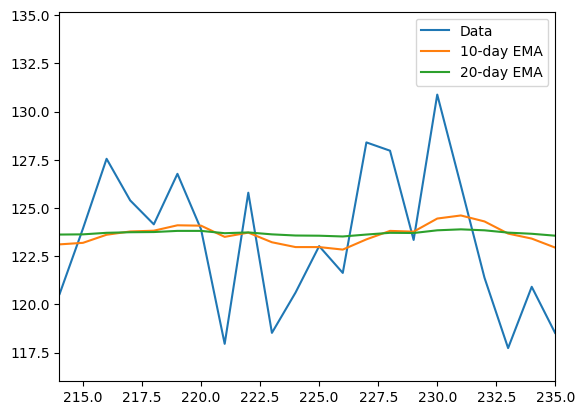

In [141]:
x = [i for i in range(1,len(data)+1)]
plt.plot(x, data, label = "Data")
plt.plot(x, emaShort, label = "10-day EMA")
plt.plot(x, emaLong, label = "20-day EMA")
plt.legend()
plt.xlim(214, 235)
# plt.ylim(214, 235)
plt.show()

Determine when to BUY/SELL

In [142]:
decision = []
for i in range(1,len(data)):
    if (emaShort[i-1] < emaLong[i-1]) and (emaShort[i] > emaLong[i]):
        print("SELL",i,data[i])
        decision.append('SELL')
    if (emaShort[i-1] > emaLong[i-1]) and (emaShort[i] < emaLong[i]):
        print("BUY",i,data[i])
        decision.append('BUY')

len(decision)


BUY 85 120.28
SELL 86 127.69
BUY 100 117.26
SELL 106 130.77
BUY 122 121.25
SELL 158 128.26
BUY 159 119.04
SELL 176 131.92
BUY 185 118.74
SELL 198 128.21
BUY 201 118.52
SELL 204 126.77
BUY 206 122.55
SELL 216 125.39
BUY 220 117.95
SELL 227 127.97
BUY 232 117.73
SELL 238 130.49
BUY 281 121.87
SELL 293 130.57
BUY 298 122.21
SELL 299 130.35
BUY 310 119.91
SELL 319 127.99
BUY 329 118.65
SELL 330 132.23
BUY 334 120.35
SELL 339 131.11
BUY 345 119.91
SELL 362 128.07
BUY 363 120.46
BUY 385 120.5
SELL 386 127.54
BUY 387 122.0
SELL 399 130.0
BUY 400 117.63
SELL 403 128.31
BUY 405 120.35
SELL 406 127.52
BUY 408 120.24
SELL 437 126.05
BUY 443 117.53
SELL 457 129.21
BUY 464 123.35
SELL 465 128.59
BUY 474 121.49
SELL 475 128.46
BUY 477 123.33
SELL 480 127.15
BUY 481 116.88
SELL 483 128.11
BUY 484 121.78
SELL 497 128.69
BUY 501 117.79
SELL 502 126.86


55

<Axes: xlabel='timeCharge', ylabel='timeDischarge'>

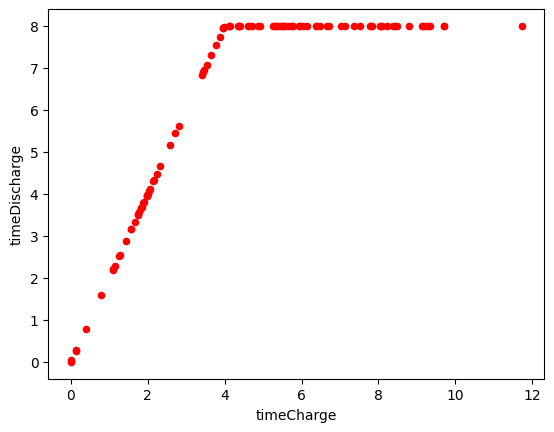

In [16]:
df.plot.scatter(x='timeCharge',y='timeDischarge',c='Red')

In [41]:
trainX = df["timeCharge"].values
trainY = df["timeDischarge"].values

trainX = np.array(trainX.reshape((-1, 1)))

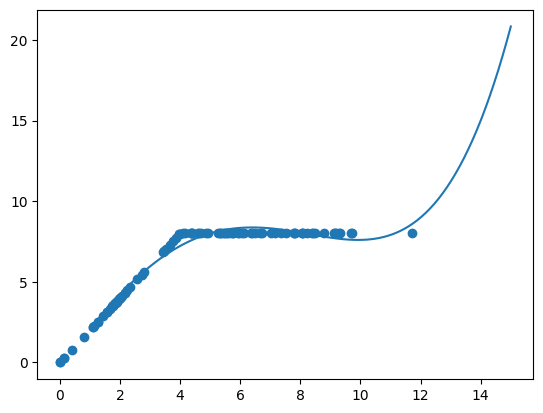

In [ ]:
mymodel = np.poly1d(np.polyfit(trainX.flatten(), trainY, 3))

myline = np.linspace(1, 15, 100)

plt.scatter(trainX.flatten(), trainY)
plt.plot(myline, mymodel(myline))
plt.show()

In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 4)
X_poly = poly.fit_transform(trainX)

lr_model = LinearRegression()
lr_model.fit(X_poly,trainY)

LinearRegression()

In [54]:
r_sq = lr_model.score(X_poly, trainY)
print(f"coefficient of determination: {r_sq}")

coefficient of determination: 0.983809937617783


In [55]:
testX_poly = poly.transform([[1.5]])
predY = lr_model.predict(testX_poly)

print(predY)

[3.19136839]


Piecewise Regression

In [59]:
import piecewise_regression

trainX = df["timeCharge"].values
trainY = df["timeDischarge"].values

pw_model = piecewise_regression.Fit(trainX, trainY, n_breakpoints=1)
pw_model.summary()


                    Breakpoint Regression Results                     
No. Observations                      100
No. Model Parameters                    4
Degrees of Freedom                     96
Res. Sum of Squares           9.52278e-28
Total Sum of Squares              596.246
R Squared                        1.000000
Adjusted R Squared               1.000000
Converged:                           True
                    Estimate      Std Err            t        P>|t|       [0.025       0.975]
----------------------------------------------------------------------------------------------------
const           -2.22045e-15     1.02e-15      -2.1806        0.0317  -4.2417e-15   -1.992e-16
alpha1                   2.0     4.38e-16   4.5621e+15           0.0          2.0          2.0
beta1                   -2.0     5.03e-16  -3.9774e+15             -         -2.0         -2.0
breakpoint1              4.0     6.33e-16            -             -          4.0          4.0
-----------------

'\n                    Breakpoint Regression Results                     \n====================================================================================================\nNo. Observations                      100\nNo. Model Parameters                    4\nDegrees of Freedom                     96\nRes. Sum of Squares           9.52278e-28\nTotal Sum of Squares              596.246\nR Squared                        1.000000\nAdjusted R Squared               1.000000\nConverged:                           True\n====================================================================================================\n====================================================================================================\n                    Estimate      Std Err            t        P>|t|       [0.025       0.975]\n----------------------------------------------------------------------------------------------------\nconst           -2.22045e-15     1.02e-15      -2.1806        0.0317  -4.2417e

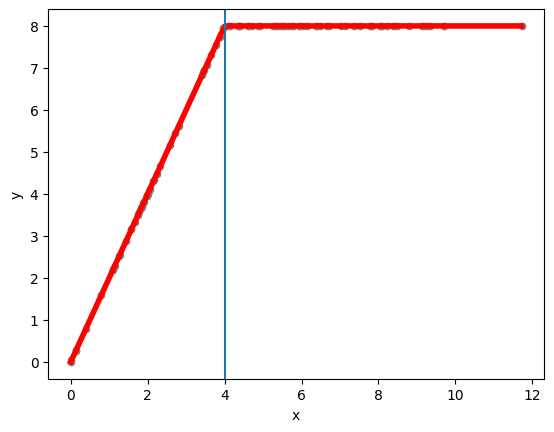

In [60]:
import matplotlib.pyplot as plt

# Plot the data, fit, breakpoints and confidence intervals
pw_model.plot_data(color="grey", s=20)
# Pass in standard matplotlib keywords to control any of the plots
pw_model.plot_fit(color="red", linewidth=4)
pw_model.plot_breakpoints()
pw_model.plot_breakpoint_confidence_intervals()
plt.xlabel("x")
plt.ylabel("y")
plt.show()
plt.close()

In [65]:
testX = [0.09]
predY = pw_model.predict(testX)

print(predY)

[0.18]


Manual Piecewise Regression

In [72]:
piece1 = df.loc[df["timeCharge"] <= 4]
piece2 = df.loc[df["timeCharge"] > 4]

In [73]:
train_piece1X = piece1["timeCharge"].values
train_piece1Y = piece1["timeDischarge"].values
train_piece2X = piece2["timeCharge"].values
train_piece2Y = piece2["timeDischarge"].values

train_piece1X = np.array(train_piece1X.reshape((-1, 1)))
train_piece2X = np.array(train_piece2X.reshape((-1, 1)))

In [74]:
from sklearn.linear_model import LinearRegression

lr1_model = LinearRegression()
lr2_model = LinearRegression()

lr1_model.fit(train_piece1X,train_piece1Y)
lr2_model.fit(train_piece2X,train_piece2Y)

LinearRegression()

In [88]:
testX = 3.76

if testX <= 4:
    predY = lr1_model.predict([[testX]])
else:
    predY = lr2_model.predict([[testX]])

print(round(predY[0],2))

7.52
